In [1]:
PATH ="../../data/"
filename = "data_homes.csv"

In [2]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay

import pandas as pd
import numpy as np
import os

In [3]:
full_filename = os.path.join(PATH, filename)

In [4]:
df = pd.read_csv(full_filename)

In [5]:
features = ['beds','bath', 'price', 'year_built', 'sqft', 'price_per_sqft', 'elevation']
labels = ['in_sf']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[labels], random_state=1984)

In [7]:
model = IsolationForest(
    n_estimators=10, 
    max_samples='auto', 
    contamination=float(0.1),
    max_features=len(features))

model.fit(df[features])

/home/pepe/miniconda3/envs/ML39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_features=7, n_estimators=10)

In [8]:
df['scores'] = model.decision_function(df[features])
df['anomaly'] = model.predict(df[features])

In [9]:
df.sort_values(by='scores', ascending=True).head(10)

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation,scores,anomaly
139,0,7.0,7.0,19500000,1994,4238,4601,10,-0.261238,-1
109,0,5.0,5.0,27500000,1930,7500,3667,21,-0.229844,-1
343,1,4.0,4.5,5200000,1952,4813,1080,238,-0.156715,-1
137,0,5.0,5.0,19000000,2016,4972,3821,15,-0.148662,-1
120,0,5.0,5.0,19000000,2016,4972,3821,10,-0.148662,-1
123,0,10.0,10.0,7995000,1910,6400,1249,12,-0.138435,-1
151,0,4.0,5.0,12000000,1939,3700,3243,22,-0.135257,-1
117,0,3.0,3.0,14950000,1931,4435,3371,10,-0.126239,-1
360,1,5.0,5.0,2990000,2014,5000,598,108,-0.124942,-1
402,1,4.0,3.5,9895000,2008,6024,1643,62,-0.116271,-1


In [10]:
print("Percentage of anomalies: {0}".format(round(df[df['anomaly']==-1].shape[0]/df.shape[0],2)))

Percentage of anomalies: 0.1


In [11]:
df.shape

(492, 10)

In [12]:
model.estimators_

[ExtraTreeRegressor(max_depth=8, max_features=1, random_state=126051491),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1746075614),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=846597341),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1822848662),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1300756416),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=620757409),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=294522279),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=18685554),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=552638662),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1222538470)]

In [13]:
outliers_counter = df[df['price'] > 6000000].shape[0]
outliers_counter

28

In [31]:
filtered = df[df['anomaly']==-1]
anomalies_outliter_counter = filtered[filtered['price'] > 6000000].shape[0]
anomalies_outliter_counter

28

In [15]:
print("Percentage of anomalies being outliers respect price {0}%".format(round(anomalies_outliter_counter/outliers_counter*100,2)))

Percentage of anomalies being outliers respect price 100.0%


In [16]:
fn=list(df[features].columns)
cn='anomaly'

[Text(0.6204656862745098, 0.9444444444444444, 'beds <= 2.648\nsquared_error = 0.078\nsamples = 256\nvalue = 0.477'),
 Text(0.3590686274509804, 0.8333333333333334, 'bath <= 1.416\nsquared_error = 0.076\nsamples = 178\nvalue = 0.492'),
 Text(0.22647058823529412, 0.7222222222222222, 'sqft <= 695.995\nsquared_error = 0.076\nsamples = 109\nvalue = 0.49'),
 Text(0.12745098039215685, 0.6111111111111112, 'sqft <= 577.332\nsquared_error = 0.067\nsamples = 33\nvalue = 0.51'),
 Text(0.07058823529411765, 0.5, 'price <= 660827.162\nsquared_error = 0.054\nsamples = 18\nvalue = 0.523'),
 Text(0.0392156862745098, 0.3888888888888889, 'price_per_sqft <= 1174.518\nsquared_error = 0.044\nsamples = 13\nvalue = 0.534'),
 Text(0.023529411764705882, 0.2777777777777778, 'beds <= 0.711\nsquared_error = 0.042\nsamples = 9\nvalue = 0.469'),
 Text(0.01568627450980392, 0.16666666666666666, 'year_built <= 1903.576\nsquared_error = 0.035\nsamples = 8\nvalue = 0.433'),
 Text(0.00784313725490196, 0.05555555555555555, '

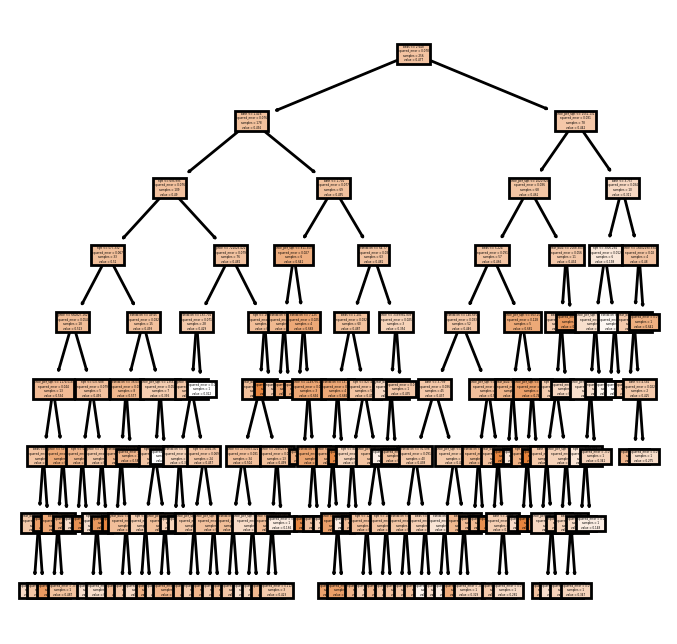

In [42]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names = 'anomaly',
               filled = True)

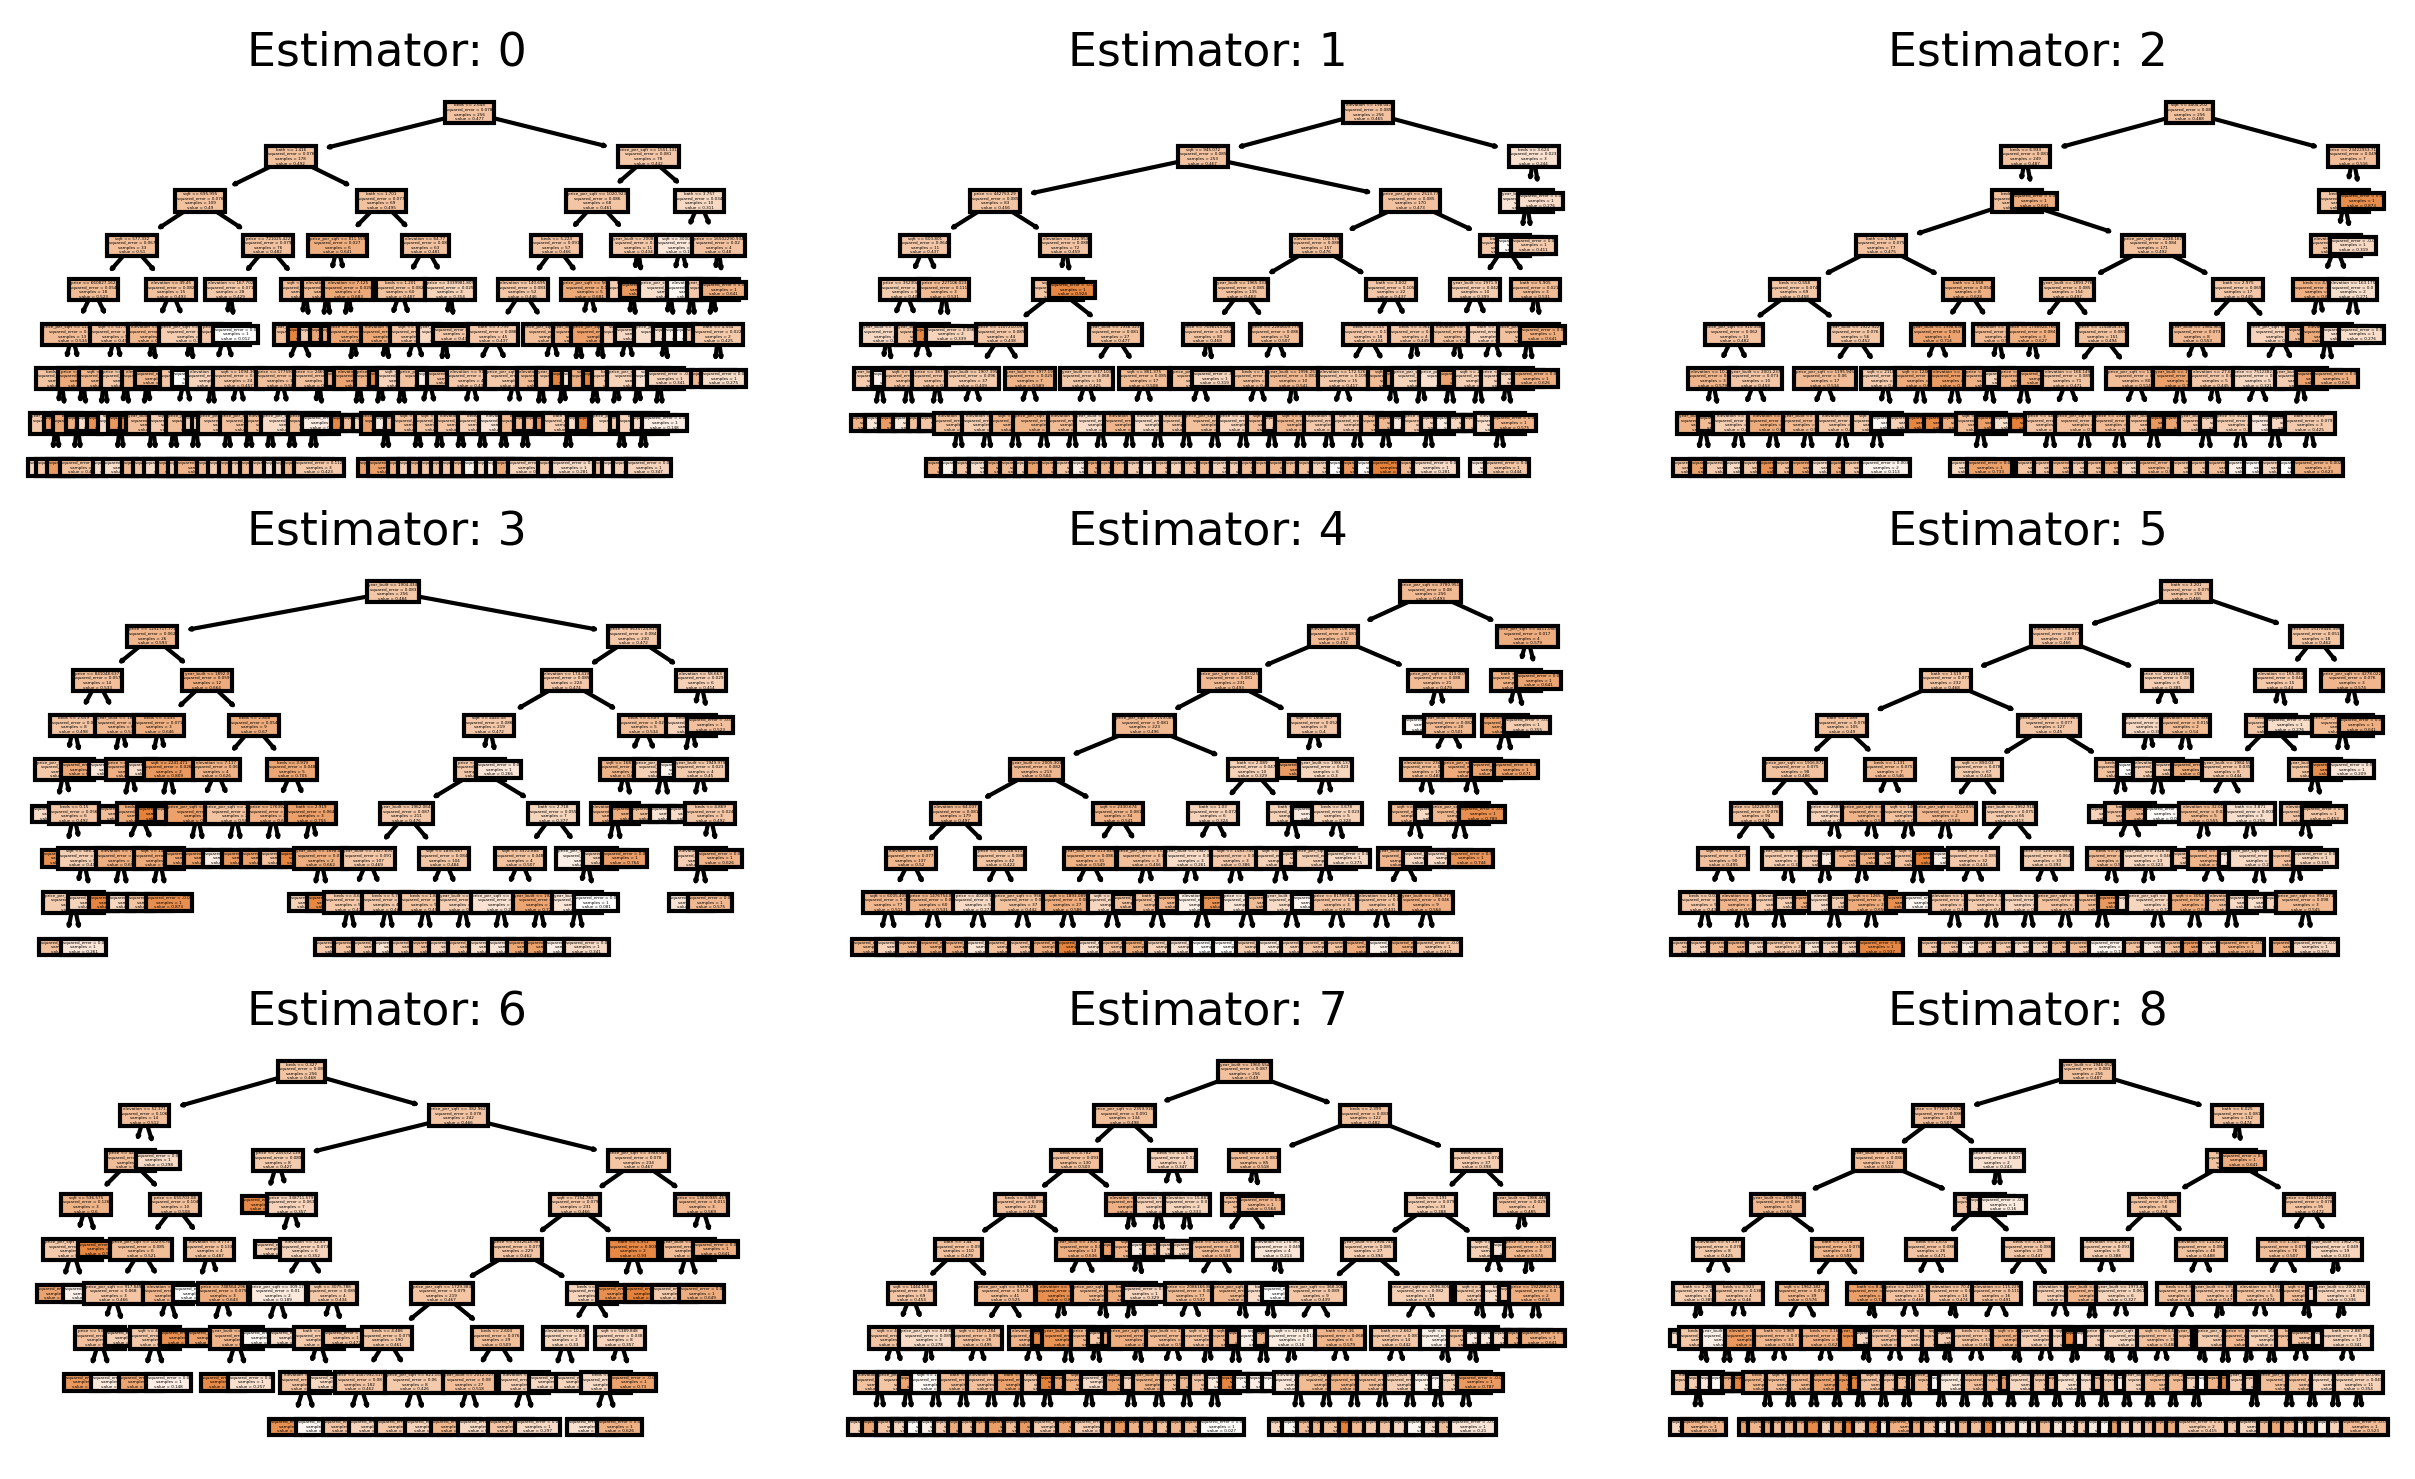

In [41]:
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows = nrows,ncols = ncols,figsize = (10,6), dpi=300)
for index in range(0, 9):
    row = index//ncols
    col = index%ncols
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names='anomaly',
                   filled = True,
                   ax = axes[row, col]
                  )
    axes[row, col].set_title('Estimator: ' + str(index), fontsize = 11)

In [33]:
from dtreeviz.trees import dtreeviz

In [44]:

viz = dtreeviz(model.estimators_[0],
               df[features], 
               df['anomaly'], 
               target_name='anomaly', 
               orientation ='LR',  # left-right orientation
               feature_names=features,
               class_names = ['inlier','anomaly'],
               X=df[features].iloc[0],
               fancy=False
              )  # need to give single observation for prediction
              
viz.view()  

In [53]:
%%script echo skip
from dtreeviz import clfviz

clfviz(
    model.estimators_[0],
    df[features],
    df['anomaly'],
    feature_names=features,
    target_name='anomaly'
)

skip


In [54]:
%%script echo skip
fig,axes = plt.subplots(1,2, figsize=(8,3.8), dpi=300)
clfviz(
    model.estimators_[0], 
    df[features], 
    df['anomaly'], 
    ax=axes[0],
    feature_names=['price', 'elevation']
)
clfviz(
    model.estimators_[0], 
    df[features], 
    df['anomaly'], 
    ax=axes[1],
    # show classification regions not probabilities
    show=['instances', 'boundaries', 'misclassified'], 
    feature_names=['price', 'elevation']
)
plt.show()

skip
